In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

date_time : 일별 날짜

wind_direction: 풍향 (degree)

sky_condition : 하늘 상태 

precipitation_form : 강수 형태 

wind_speed : 풍속 (m/s)

humidity : 습도 (%)

low_temp : 최저 기온 ( `C)

high_temp : 최고 기온 ( `C)

Precipitation_Probability : 강수 확률 (%)

number_of_rentals : 따릉이 대여량

기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.

2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)

2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)

precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)

(원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.)

In [2]:
train.head(3)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.0,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.0,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.0,2.690,74.879,10.312,15.316,19.113,26817


데이터를 살펴보니 우선 풍향 데이터는 없애주는것이 좋을것같다. 

date_time은 년,월,일 로 나누어 주자. 

이후에 추가할 칼럼은 데이터의 분포를 보고 결정하자

In [3]:
train = train.drop(['wind_direction'],axis=1)
test = test.drop(['wind_direction'],axis=1)

In [4]:
train['date_time'] = pd.to_datetime(train['date_time'])

In [5]:
train['year'] = train['date_time'].dt.year
train['month'] = train['date_time'].dt.month
train['days'] = train['date_time'].dt.day
train['day_name'] = train['date_time'].dt.day_name()

In [6]:
train = train.drop(['date_time'],axis=1)

In [7]:
test['date_time'] = pd.to_datetime(test['date_time'])
test['year'] = test['date_time'].dt.year
test['month'] = test['date_time'].dt.month
test['days'] = test['date_time'].dt.day
test['day_name'] = test['date_time'].dt.day_name()
test = test.drop(['date_time'],axis=1)

In [8]:
train.head(3)

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,days,day_name
0,4.000,0.0,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2.950,0.0,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2.911,0.0,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday


In [9]:
train.describe()

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,days
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2019.000000,5.000000,15.670330
std,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195
min,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,2018.000000,4.000000,1.000000
25%,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,2018.000000,4.000000,8.000000
50%,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2019.000000,5.000000,16.000000
75%,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,2020.000000,6.000000,23.000000
max,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,2020.000000,6.000000,31.000000


In [10]:
train.head(3)

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,days,day_name
0,4.000,0.0,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2.950,0.0,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2.911,0.0,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday


array([[<AxesSubplot:title={'center':'sky_condition'}>,
        <AxesSubplot:title={'center':'precipitation_form'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'low_temp'}>,
        <AxesSubplot:title={'center':'high_temp'}>],
       [<AxesSubplot:title={'center':'Precipitation_Probability'}>,
        <AxesSubplot:title={'center':'number_of_rentals'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'days'}>, <AxesSubplot:>]],
      dtype=object)

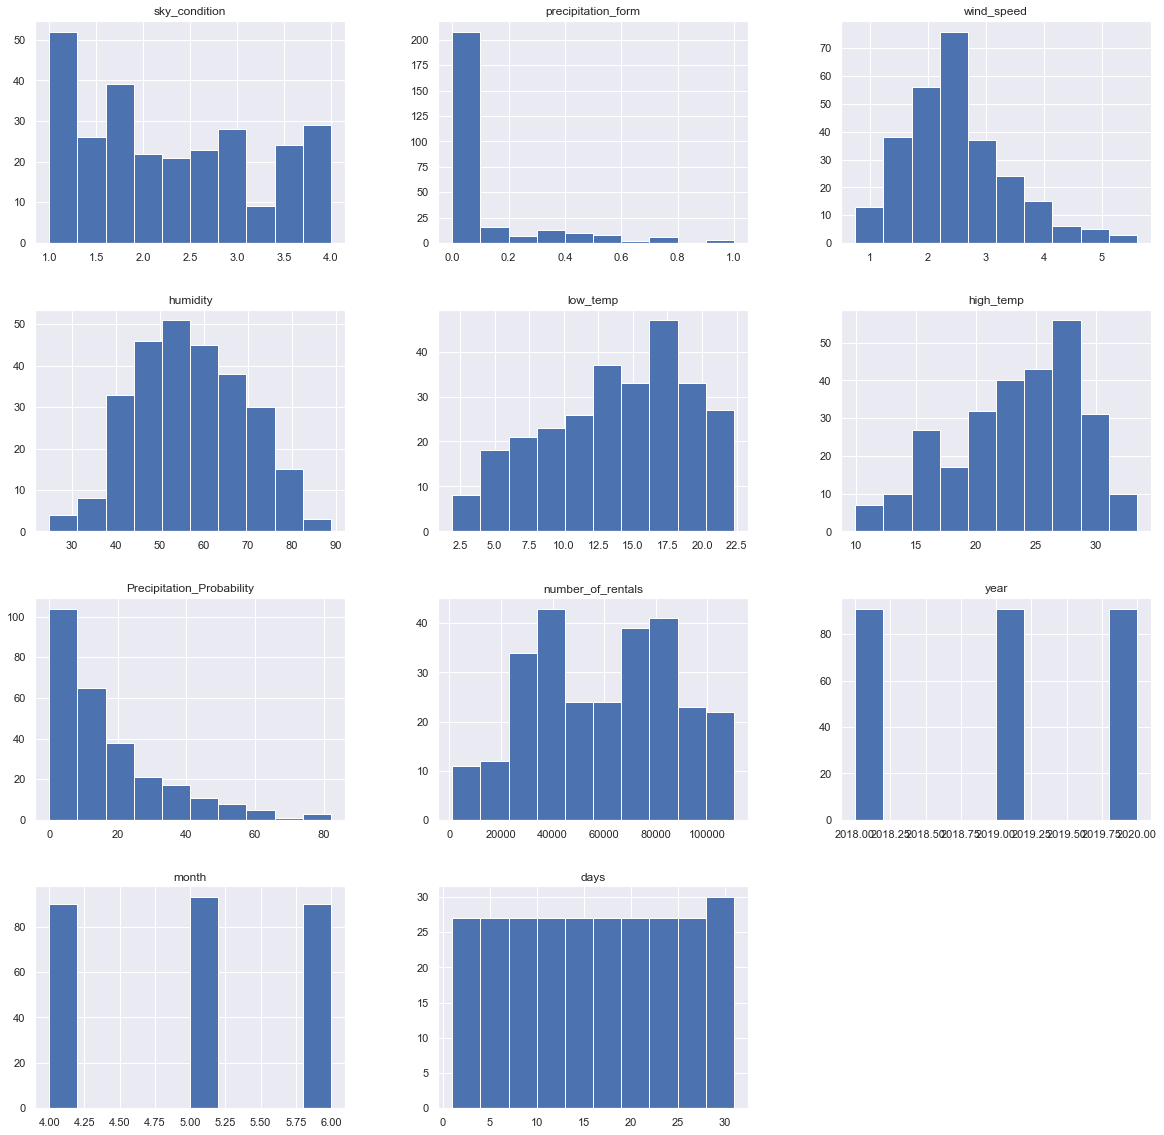

In [11]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,20)})

train.hist()

몇개의 데이터들이 정규분포 형태를 띄지 않고있다.

그리고 precipitation_form 이나 sky_condition의 경우 정수형태로 딱딱 떨어지는것이 아니라 소수 형태로 데이터가 있는게 이상하다고 생각했다.

그래서 위 2개의 데이터는 반올림해주어 정수형태로 변환했다.

In [12]:
def condition(x):
    form =''
    if x <0.5: form = 0
    elif x<1.5: form = 1
    elif x<2.5: form = 2
    elif x<3.5: form = 3
    else : form = 4
        
    return form

train['sky_condition'] = train['sky_condition'].apply(lambda x : condition(x))
train['precipitation_form'] = train['precipitation_form'].apply(lambda x : condition(x))

또한 데이터들은 로그변환을 이용해 정규화 시켜주자

wind_speed, humidity, low_temp, high_temp, Precipitation_Probability

In [13]:
import numpy as np
train['wind_speed'] = np.log1p(train['wind_speed'])
train['humidity'] = np.log1p(train['humidity'])
train['low_temp'] = np.log1p(train['low_temp'])
train['high_temp'] = np.log1p(train['high_temp'])
train['Precipitation_Probability'] = np.log1p(train['Precipitation_Probability'])

In [14]:
test['sky_condition'] = test['sky_condition'].apply(lambda x : condition(x))
test['precipitation_form'] = test['precipitation_form'].apply(lambda x : condition(x))
test['wind_speed'] = np.log1p(test['wind_speed'])
test['humidity'] = np.log1p(test['humidity'])
test['low_temp'] = np.log1p(test['low_temp'])
test['high_temp'] = np.log1p(test['high_temp'])
test['Precipitation_Probability'] = np.log1p(test['Precipitation_Probability'])

<AxesSubplot:xlabel='year', ylabel='number_of_rentals'>

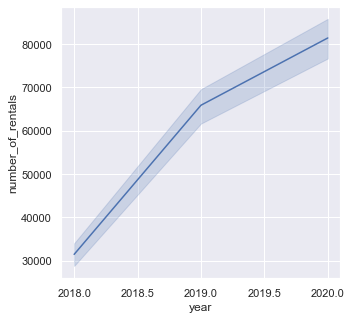

In [15]:
# 렌탈수와 피처간의 관계 살펴보기
sns.set(rc = {'figure.figsize':(5,5)})
sns.lineplot(data = train, x='year', y='number_of_rentals')

<AxesSubplot:xlabel='month', ylabel='number_of_rentals'>

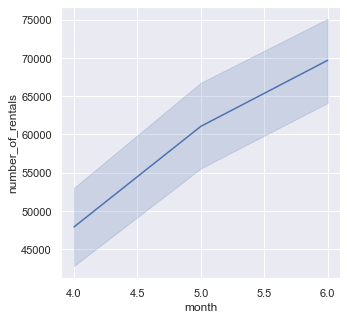

In [16]:
sns.lineplot(data = train, x='month', y='number_of_rentals')

<AxesSubplot:xlabel='days', ylabel='number_of_rentals'>

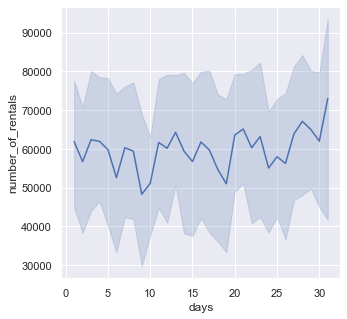

In [17]:
sns.lineplot(data = train, x='days', y='number_of_rentals')

<AxesSubplot:xlabel='day_name', ylabel='number_of_rentals'>

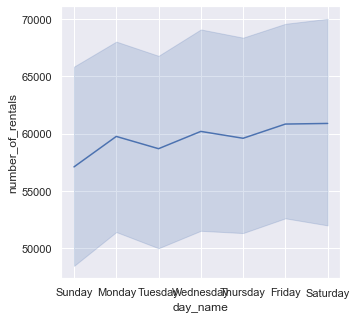

In [18]:
sns.lineplot(data = train, x='day_name', y='number_of_rentals')

년도와 월별의 경우 갈수록 렌탈수가 증가한다. 

날짜의 경우 각 날마다 들쑥날쑥하고 요일은 주말에 대여가 많을거라고 생각했지만 별차이가 없고 오히려 일요일이 가장 적다.

<AxesSubplot:xlabel='sky_condition', ylabel='number_of_rentals'>

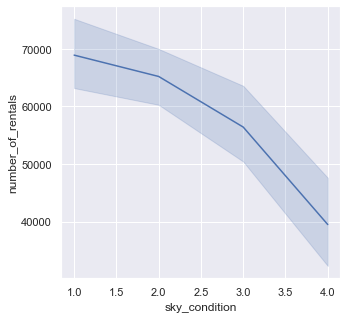

In [19]:
sns.lineplot(data = train, x='sky_condition', y='number_of_rentals')

<AxesSubplot:xlabel='precipitation_form', ylabel='number_of_rentals'>

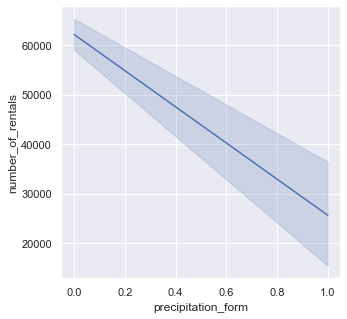

In [20]:
sns.lineplot(data = train, x='precipitation_form', y='number_of_rentals')

확실히 기상상태에 따라 따릉이 대여수가 눈에띄게 차이가 난다.

<AxesSubplot:xlabel='humidity', ylabel='number_of_rentals'>

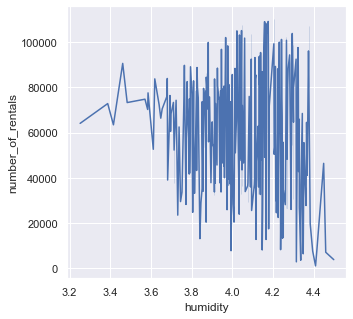

In [21]:
sns.lineplot(data = train, x='humidity', y='number_of_rentals')

<AxesSubplot:xlabel='wind_speed', ylabel='number_of_rentals'>

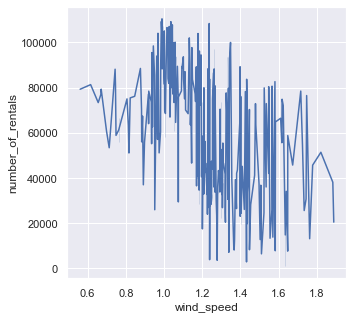

In [22]:
sns.lineplot(data = train, x='wind_speed', y='number_of_rentals')

<AxesSubplot:xlabel='high_temp', ylabel='number_of_rentals'>

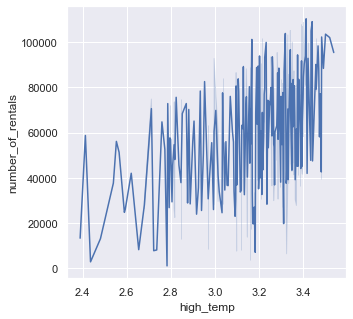

In [23]:
sns.lineplot(data = train, x='high_temp', y='number_of_rentals')

<AxesSubplot:xlabel='low_temp', ylabel='number_of_rentals'>

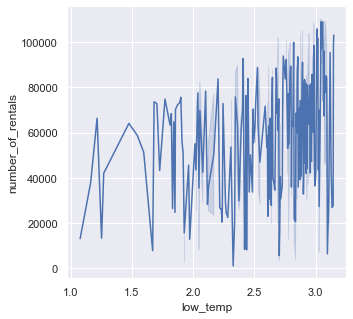

In [24]:
sns.lineplot(data = train, x='low_temp', y='number_of_rentals')

기온, 습도, 풍향의 경우 렌탈수가 매우 들쭉날쭉하다

<AxesSubplot:xlabel='precipitation_form', ylabel='Precipitation_Probability'>

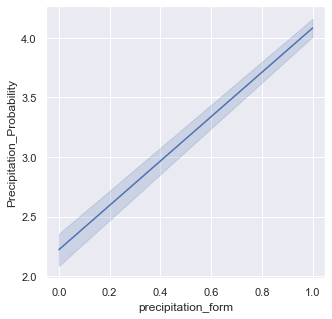

In [25]:
sns.lineplot(data = train, y='Precipitation_Probability', x='precipitation_form')

강수 확률과 강수 형태를 살펴보면 확률이 증가할수록 강수형태도 증가한다. 

<AxesSubplot:>

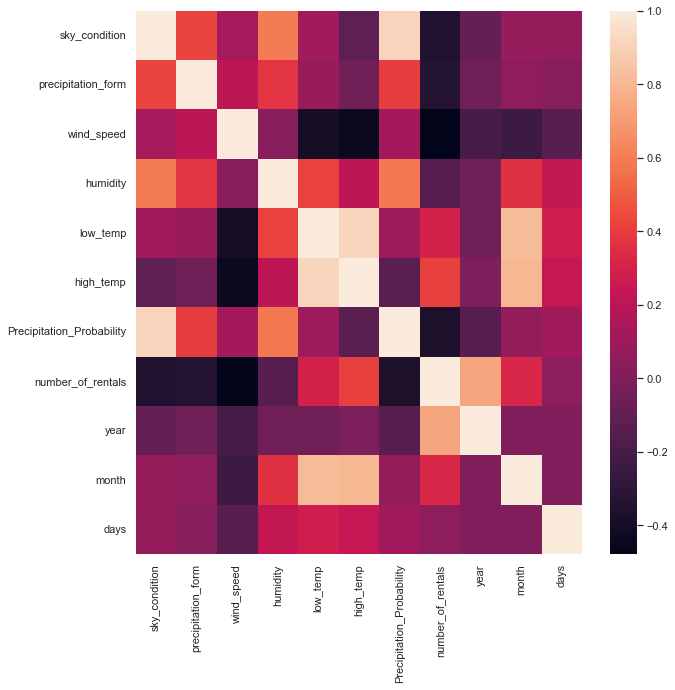

In [26]:
sns.set(rc = {'figure.figsize':(10,10)})
corr = train.corr()
sns.heatmap(corr)

In [27]:
# 로그변환
train = pd.get_dummies(train)
test =  pd.get_dummies(test)

In [28]:
train.head(3)

,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,days,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,4,0,1.398717,4.330733,2.610070,3.091042,3.433987,22994,2018,4,1,0,0,0,1,0,0,0
1,3,0,1.453486,4.260325,2.625538,2.995732,3.020425,28139,2018,4,2,0,1,0,0,0,0,0
2,3,0,1.305626,4.329140,2.425864,2.792146,3.001366,26817,2018,4,3,0,0,0,0,0,1,0


In [29]:
def nmae(pred, y):
    nmae = np.mean(abs(pred-y)/y)
    return nmae

# xgboost

In [30]:
# 모델 분리 
train_df = train.drop(['number_of_rentals'], axis=1)
target_df = train['number_of_rentals']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df, target_df, test_size=0.2)

In [49]:
# xgboost 모델 생성
from xgboost import XGBRegressor
xgb= XGBRegressor(n_estimators = 100)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
nmae(pred,y_test)

0.1784472704737847

In [44]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
parameter = {'max_depth':[3,5,7],'learning_rate':[0.01,0.1],'min_child_weight':[1,3,5],'sub_sample':[0.5,0.75,1],'colsample_bytree':[0.5,0.75,1]}
cv = GridSearchCV(xgb, param_grid=parameter,cv=3, scoring = 'neg_mean_absolute_error')
cv.fit(x_train,y_train)

[21:34:30] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:31] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:31] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:32]

[21:34:46] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:47] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:47] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:48]

[21:35:10] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:11] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:12] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:14]

[21:35:45] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:46] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:48] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:50]

[21:36:05] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:06] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:07] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:07]

[21:36:26] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:27] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:28] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:29]

[21:36:57] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:58] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:36:59] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:01]

[21:37:21] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:22] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:23] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:25]

[21:37:43] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:44] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:45] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:45]

[21:38:10] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:11] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:12] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:14]

[21:38:37] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:37] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:38] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:39]

[21:38:56] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:57] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:58] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:38:59]

[21:39:20] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:21] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:23] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:24]

[21:39:55] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:56] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:57] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:57]

[21:40:13] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:14] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:15] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:16]

[21:40:45] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:46] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:47] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:48]

[21:41:13] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:41:14] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:41:15] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:41:18]

[21:41:36] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:41:37] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:41:38] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:41:39]

[21:42:03] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:04] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:05] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:06]

[21:42:34] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:35] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:36] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:37]

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=500, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [45]:
best = cv.best_params_
print(best)

{'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'sub_sample': 0.5}


In [51]:
xgb= XGBRegressor(n_estimators = 100, colsample_bytree= 0.75, learning_rate= 0.1, max_depth= 5, min_child_weight= 1, sub_sample=0.5)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
nmae(pred,y_test)

[21:43:53] WARNING: ..\src\learner.cc:541: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.21873059128327646

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

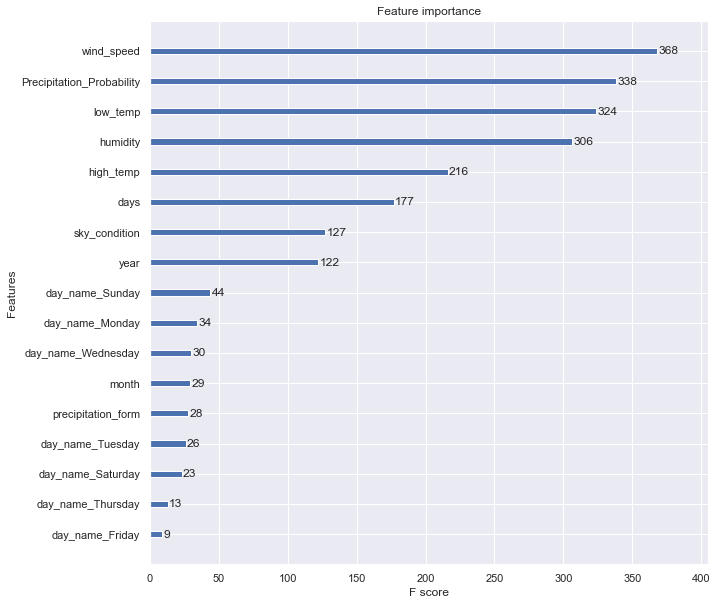

In [52]:
# 피처 중요도 확인
from xgboost import plot_importance
plot_importance(xgb)

오차가 매우 크다


---